## BIA Bob
BIA Bob is a Jupyter-magic based assistant for interacting with data via code. 

In [1]:
from bia_bob import bob
bob.initialize('gpt-4-1106-preview')
bob.__version__

'0.6.2'

You can use the `%bob` single-line or the `%%bob` multi-line magic to ask for programming image analysis tasks and `bob` will generate code for this and paste it in a new cell below. You need to wait until this cell exists before you can execute it. Thus, running an entire notebook in one shot makes little sense. Run it cell-by-cell instead and consider reading generated code before executing it.

In [2]:
%bob Load the ../../data/blobs.tif image file and show it.

### Step-by-step Plan:
1. Load the image file `../../data/blobs.tif` using `imread` from `skimage.io`.
2. Display the loaded image using `stackview.insight`.

Now I will write the code following these steps.



StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
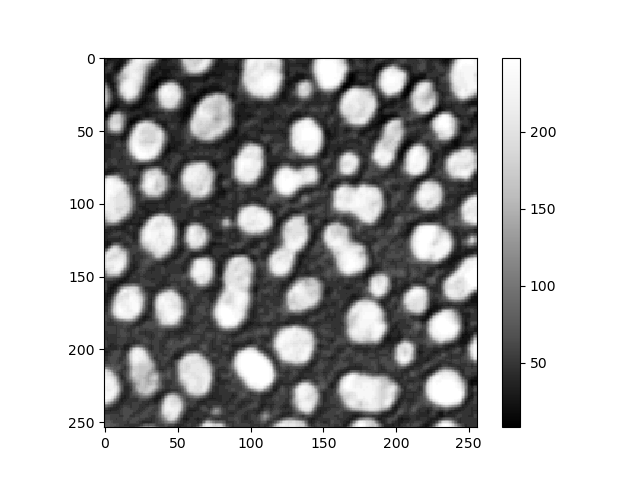
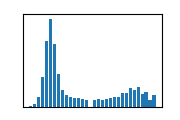

In [3]:
from skimage.io import imread
import stackview

# Load the image
filename = '../../data/blobs.tif'
image = imread(filename)

# Display the image
stackview.insight(image)

In [8]:
%%bob
Load the ../../data/blobs.tif grayscale image from disc.
Segment the nuclei-like objects in it using 
Otsu's method and connected component labeling.
Measure area of the segmented labels.
Print the area on top of the labels.

### Step-by-step Plan:
1. Load the grayscale image `../../data/blobs.tif` from disk.
2. Segment the nuclei-like objects by finding Otsu's threshold and then applying it to create a binary mask.
3. Perform connected component labeling on the binary mask to identify distinct objects.
4. Measure the area of each segmented label using `regionprops`.
5. Overlay the measurement (area) on top of each label in the label image.
6. Display the label image with printed area measurements on top.

Proceeding with the code for the steps:



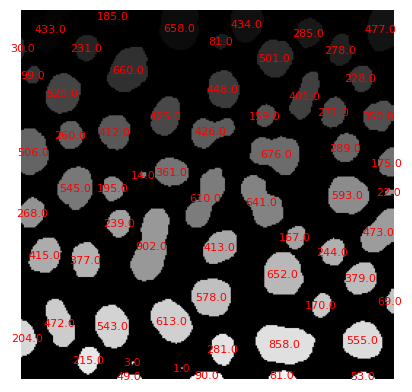

In [9]:
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt

# Load the image
filename = '../../data/blobs.tif'
image = imread(filename)

# Segment the image using Otsu's threshold
thresh = threshold_otsu(image)
binary_mask = image > thresh

# Label the image
label_image = label(binary_mask)

# Calculate properties of labeled regions
properties = regionprops(label_image)

# Print the area for each label on the image
fig, ax = plt.subplots()
ax.imshow(label_image, cmap='gray')

for prop in properties:
    y0, x0 = prop.centroid
    area = prop.area
    ax.text(x0, y0, str(area), fontsize=8, color='red', ha='center', va='center')

ax.set_axis_off()
plt.show()

In [10]:
%%bob
Take the segmented label image and expand the labels by 4 pixels. Show the resulting label image alone.

### Step-by-step Plan:
1. Take the already segmented label image which is stored in the variable `label_image`.
2. Expand the labels by 4 pixels using the `expand_labels` function from `skimage.segmentation`.
3. Display the resulting expanded label image.

Here is the code to execute these steps:



StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
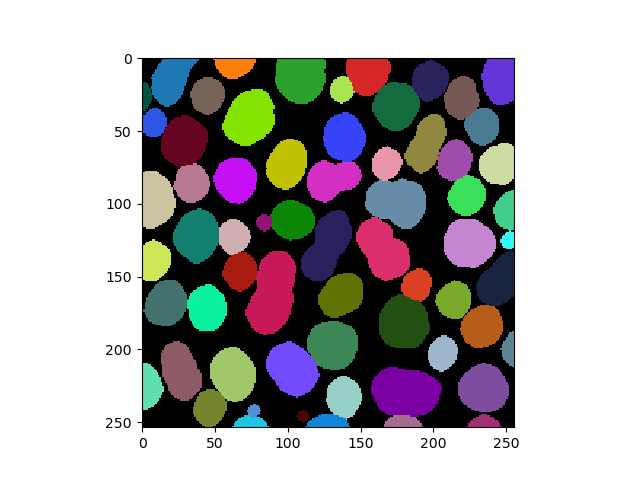

In [11]:
from skimage.segmentation import expand_labels
import stackview

# Expand the labels by 4 pixels
expanded_labels = expand_labels(label_image, distance=4)

# Display the expanded label image
stackview.insight(expanded_labels)